In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import itertools

In [2]:
# Load dataset 
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# Display dataset structure
print("Train Data:")
print(train_data.head())
print("Test Data:")
print(test_data.head()) 

Train Data:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0       

In [4]:
# Checking for missing values
print(train_data.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [5]:
# Split features and labels
X_train = train_data.iloc[:, 1:]  # All pixel values as features
y_train = train_data.iloc[:, 0]   # Label column

X_test = test_data.iloc[:, 1:]  # All pixel values as features
y_test = test_data.iloc[:, 0]   # Label column

In [6]:
# Normalize the pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

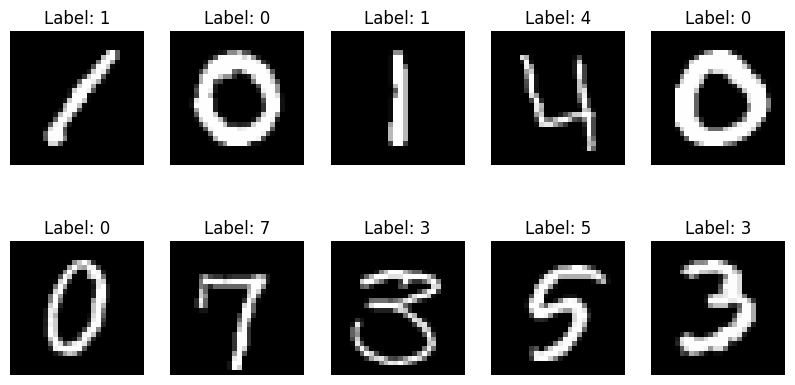

In [7]:
# Visualize some of the training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
    plt.axis('off')
plt.show()


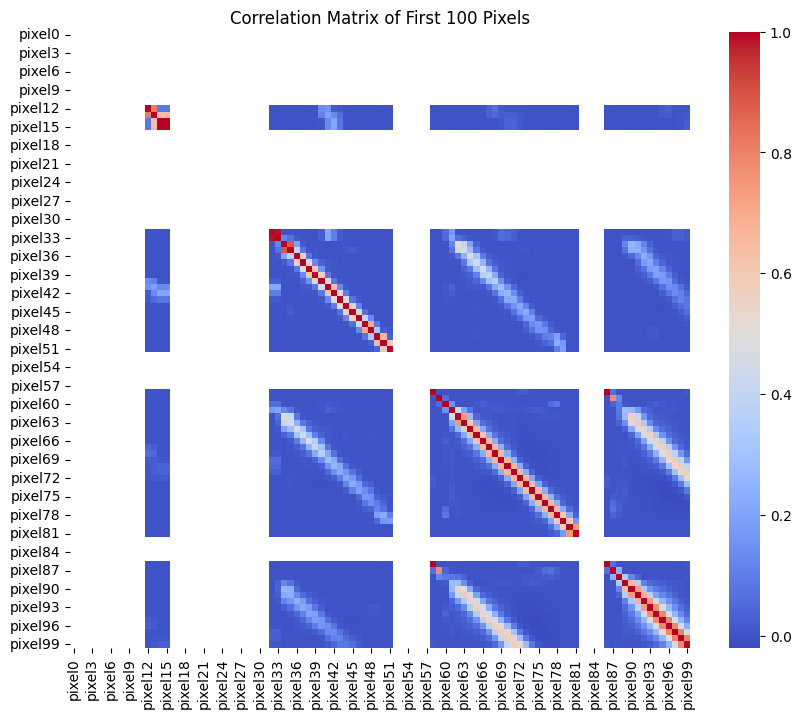

In [8]:
# Correlation Matrix for the first 100 pixels
corr_matrix = train_data.iloc[:, 1:101].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of First 100 Pixels")
plt.show()

In [9]:

# Split the train data for validation (80% training, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
# Confusion matrix plotting function
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

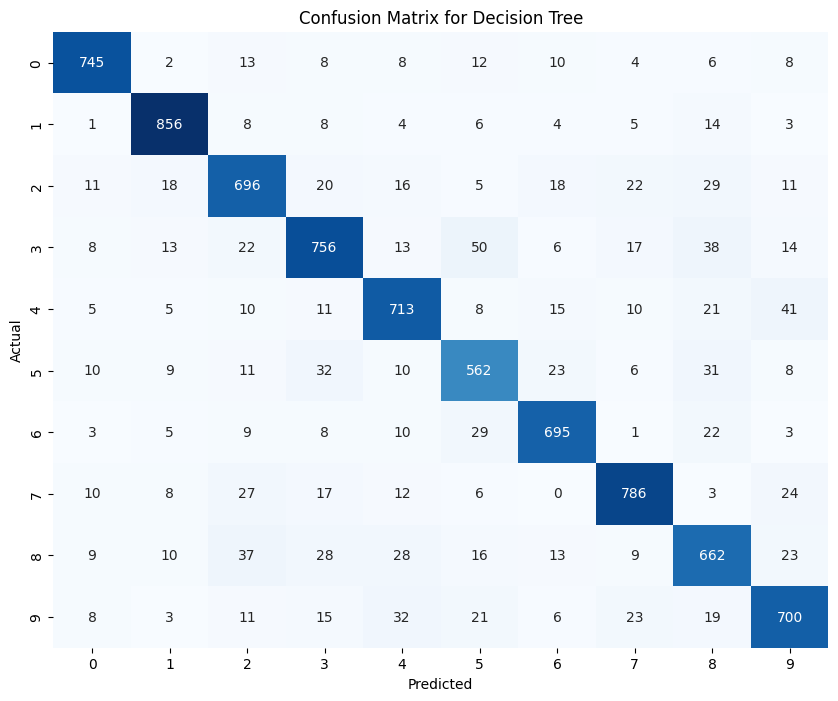

In [11]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split, y_train_split)
y_pred_dt = dt_model.predict(X_val_split)
plot_confusion_matrix(y_val_split, y_pred_dt, "Decision Tree")

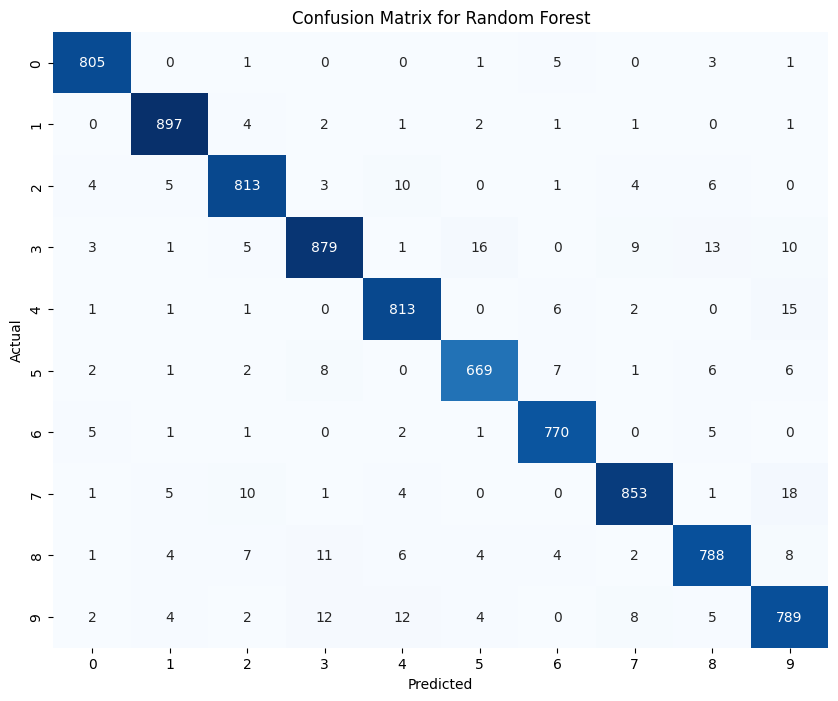

In [12]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_split, y_train_split)
y_pred_rf = rf_model.predict(X_val_split)
plot_confusion_matrix(y_val_split, y_pred_rf, "Random Forest")

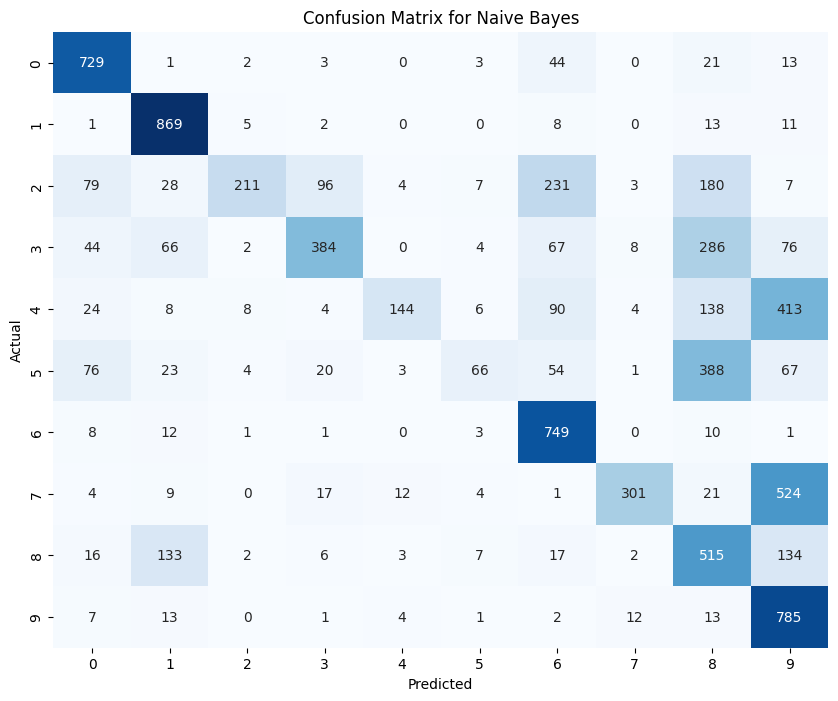

In [13]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_split, y_train_split)
y_pred_nb = nb_model.predict(X_val_split)
plot_confusion_matrix(y_val_split, y_pred_nb, "Naive Bayes")

In [14]:
# Multilayer ANN
ann_model = Sequential()
ann_model.add(Input(shape=(X_train_split.shape[1],)))  # Input layer
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))  # 10 output classes (digits 0-9)

In [15]:
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(X_train_split, y_train_split, epochs=10, batch_size=64, validation_data=(X_val_split, y_val_split))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 0.5251 - val_accuracy: 0.9565 - val_loss: 0.1529
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1202 - val_accuracy: 0.9668 - val_loss: 0.1100
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9770 - loss: 0.0763 - val_accuracy: 0.9665 - val_loss: 0.1068
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9822 - loss: 0.0555 - val_accuracy: 0.9693 - val_loss: 0.0967
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9883 - loss: 0.0358 - val_accuracy: 0.9740 - val_loss: 0.0874
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0269 - val_accuracy: 0.9718 - val_loss: 0.0919
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9737 - val_loss: 0.0941
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


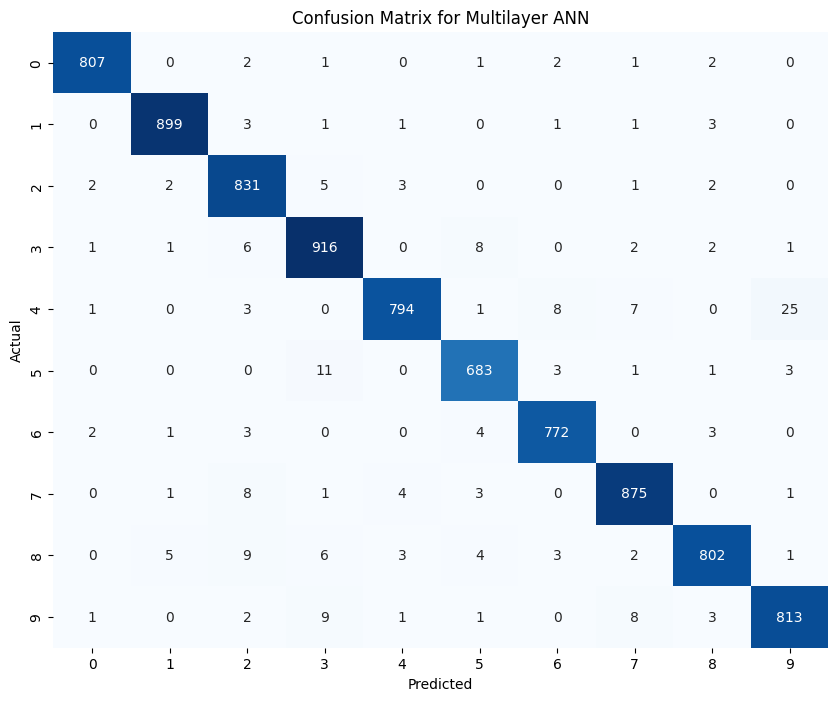

In [16]:
# Evaluation of ANN
y_pred_ann = np.argmax(ann_model.predict(X_val_split), axis=-1)
plot_confusion_matrix(y_val_split, y_pred_ann, "Multilayer ANN")

In [17]:
# Evaluation function to compare metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}")
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(df_report)
    return df_report

In [18]:
# Collect evaluation metrics for all models
metrics_dt = evaluate_model(y_val_split, y_pred_dt, "Decision Tree")
metrics_rf = evaluate_model(y_val_split, y_pred_rf, "Random Forest")
metrics_nb = evaluate_model(y_val_split, y_pred_nb, "Naive Bayes")
metrics_ann = evaluate_model(y_val_split, y_pred_ann, "Multilayer ANN")


Evaluation for Decision Tree
              precision    recall  f1-score     support
0              0.919753  0.912990  0.916359   816.00000
1              0.921421  0.941694  0.931447   909.00000
2              0.824645  0.822695  0.823669   846.00000
3              0.837209  0.806830  0.821739   937.00000
4              0.842790  0.849821  0.846291   839.00000
5              0.786014  0.800570  0.793225   702.00000
6              0.879747  0.885350  0.882540   785.00000
7              0.890147  0.880179  0.885135   893.00000
8              0.783432  0.792814  0.788095   835.00000
9              0.838323  0.835322  0.836820   838.00000
accuracy       0.853690  0.853690  0.853690     0.85369
macro avg      0.852348  0.852827  0.852532  8400.00000
weighted avg   0.853723  0.853690  0.853648  8400.00000

Evaluation for Random Forest
              precision    recall  f1-score      support
0              0.976942  0.986520  0.981707   816.000000
1              0.976061  0.986799  0.98140

In [19]:
# Accuracy comparison
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Multilayer ANN']
accuracy_scores = [
    accuracy_score(y_val_split, y_pred_dt),
    accuracy_score(y_val_split, y_pred_rf),
    accuracy_score(y_val_split, y_pred_nb),
    accuracy_score(y_val_split, y_pred_ann)
]

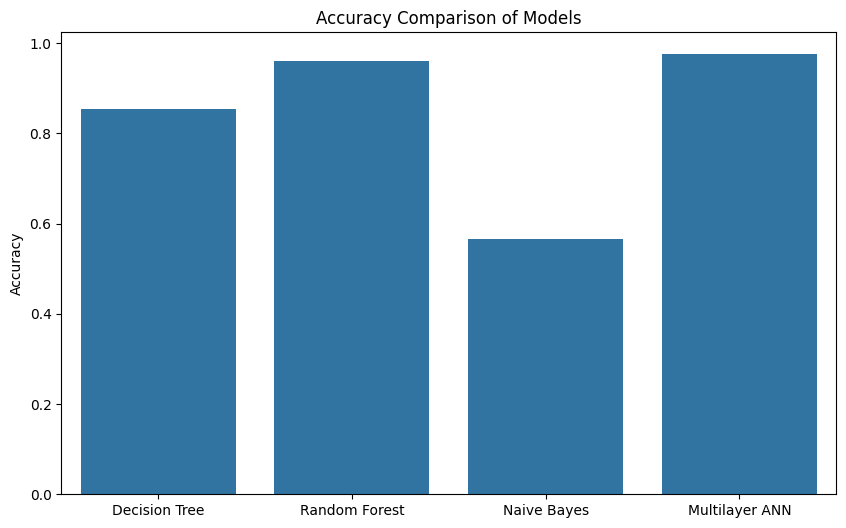

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.show()

In [21]:
# Comparison of Precision, Recall, F1-Score for each model
metrics = ['precision', 'recall', 'f1-score']
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'Decision Tree': [metrics_dt.loc['macro avg', 'precision'], metrics_dt.loc['macro avg', 'recall'], metrics_dt.loc['macro avg', 'f1-score']],
    'Random Forest': [metrics_rf.loc['macro avg', 'precision'], metrics_rf.loc['macro avg', 'recall'], metrics_rf.loc['macro avg', 'f1-score']],
    'Naive Bayes': [metrics_nb.loc['macro avg', 'precision'], metrics_nb.loc['macro avg', 'recall'], metrics_nb.loc['macro avg', 'f1-score']],
    'Multilayer ANN': [metrics_ann.loc['macro avg', 'precision'], metrics_ann.loc['macro avg', 'recall'], metrics_ann.loc['macro avg', 'f1-score']]
})

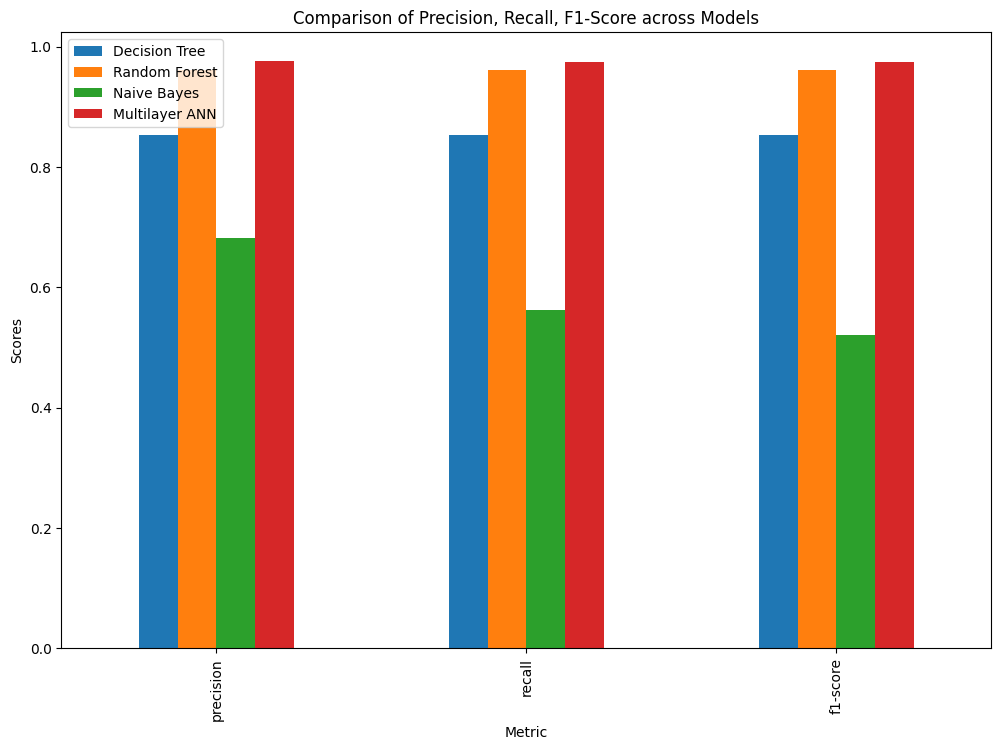

In [22]:

metrics_df.set_index('Metric', inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Precision, Recall, F1-Score across Models')
plt.ylabel('Scores')
plt.show()